# İstatistik Sihri ve Dünya Savaşları

Sayılar arası ilişki kurma becerisi bazen sihirli gibi gözüken şeyleri başarmayı sağlar. Derin öğrenme sayesinde devasa miktardaki veri arasında bu bağları kurmak daha kolaydır ancak profesyonellerin becerilerinin neler yapabileceğini görmek şaşırtıcı.

İkinci dünya savaşı sırasında istatistikçiler alman tanklarının seri numaralarından yola çıkarak toplam tank sayısını tahmin ettiler. Ancak unutulmaması gereken şey ellerinde sadece bazı tanklara ait seri numaraları bulunuyordu. Peki bunu nasıl yaptılar?

Öncelikle Bayes teoremini biraz anlayalım. bu elimizdeki bilgiye yenileri eklendikçe olasılık tahminlerimizdeki değişimi gösterir.

Örneğin kesinlikle 2 çocuğu olan bir ailenin en az 1 erkek çocuğu olma ihtimali %75 olacaktır. Çünkü ihtimaller kız-kız / erkek-erkek / kız -erkek / erkek - kız şeklindedir. Bu 4 ihtimalden 3 ü şartımızı sağlar. 

Peki ya birisi bize bu ailenin kesinlikle en az 1 kız çocuğu olduğunu söylerse?

artık ihtimal havuzumuz kız-kız  / kız -erkek / erkek - kız  olacaktır. Artık erkek çocuk olma ihtimal 3te 2 yani yaklaşık %66 oldu.

Her doğumda kız ya da erkek olma oranı önceki çocuklardan bağımsızdır. Ancak olaylar olduktan sonra eldeki bilgiler arttıkça olasılık yapısı değişir.



<div style="text-align: center;">
    <img src="bayes1.png" alt="bayes" style="height:300px;" />
</div>

P(A|B) = B olayı gerçekleştiğinde A olayının gerçekleşme olasılığı <br>
P(A) = A olayının gerçekleşme olasılığı <br>
P(B|A) = A olayı gerçekleştiğinde B olayının gerçekleşme olasılığı <br>
P(B) = B olayının gerçekleşme olasılığı <br>

 Bir araştırmaya göre her 43 çocuktan 1 tanesi, yetişkinlikte ortaya çıkan belli bir hastalığa yakalanmakta ve tam güvenilir olmamasına rağmen yapılan test sonuçlarına göre, hastalıklı bir çocuğun testi %80 pozitif, sağlıklı bir çocuğun testi ise %10 pozitif sonuç vermektedir. Bu bilgilere göre test sonucu pozitif olan bir çocuğun gerçekten hasta olma olasılığı nedir? <br>
        
P(A) : Çocuğun hasta olması olasılığı = 1/43  <br>        
P(B) : Testin pozitif çıkması olasılığı = 1/43 * 0.80 + 42/43 * 0.10 = 5/43 <br>           
P(A|B) : Pozitif çıkan testin hastalık çıkma olasılığı ( sorulan bu )     <br>   
P(B|A) : Hastalıklı çocuğun testinin pozitif çıkma olasılığı = 0.80   <br>      
      
P(A|B)=P(B|A)*P(A)/P(B) => (0.80 * 1/43) / (5/43) = 0.16 = %16 bulunur.

Peki tanklara geri dönelim. Tanklarda durum şuydu her yeni elde edilen tank parçası ve üzerindeki seri numarası elde edilen yeni bir bilgi olacaktı.  Bunu bir torbadan çekilen toplara benzetebiliriz. Her topun ise bir numarası olduğunu düşünelim. bu numaralar  1,2,3,4,.....x şeklinde 1 den x'e devam etsin.  Çekilen topların numaralarının dağlımı uniform mu normal(gaussian) mı olmalı?

<div style="text-align: center;">
    <img src="distr.png" alt="bayes" style="height:200px;" />
</div>

Basitçe test edelim, Öncelikle rastgele  bir maks sayı oluşturup 5 adet veri alacağız ve bunu bir grafik yapacağız ardından veris sayımızı 10 ve 20 yapıp dağılımın nasıl şekillendiğine bakacağız.

208
[12, 112, 129, 145, 205]


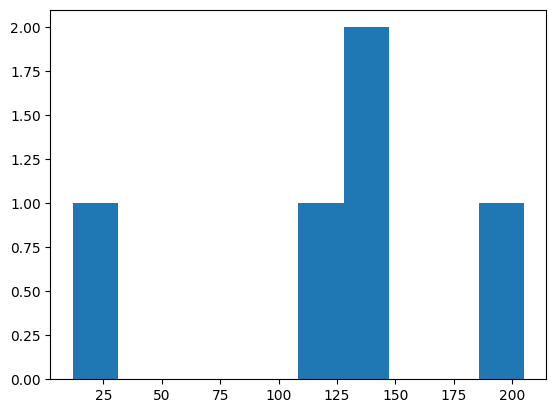

In [126]:
import random
import matplotlib.pyplot as plt
import numpy as np

dataAmount = 5

maxNumber = random.randint(100, 500)

results = []

# sadece aynı değilse ekle çünkü aynı topu iki kere çekemezsin
while len(results)<dataAmount:
    a = random.randint(0, maxNumber)
    if a not in results:
        results.append(a)

print(maxNumber)
results.sort()
print(results)

npArrResults = np.array(results)
plt.hist(npArrResults)
plt.show() 

208
[12, 18, 60, 62, 112, 129, 135, 136, 145, 205]


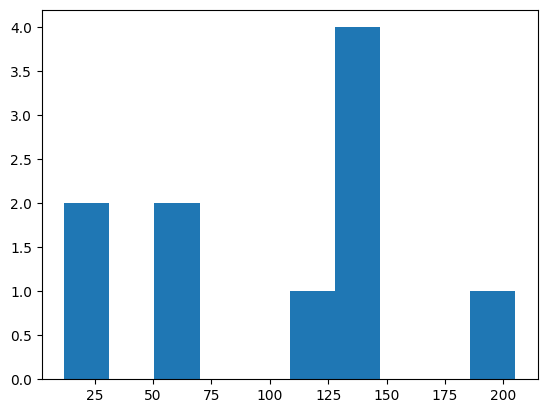

In [127]:
dataAmount = 10

# sadece aynı değilse ekle çünkü aynı topu iki kere çekemezsin
while len(results)<dataAmount:
    a = random.randint(0, maxNumber)
    if a not in results:
        results.append(a)

print(maxNumber)
results.sort()
print(results)

npArrResults = np.array(results)
plt.hist(npArrResults)
plt.show() 

208
[10, 12, 18, 60, 62, 64, 82, 111, 112, 121, 128, 129, 135, 136, 145, 171, 187, 189, 200, 205]


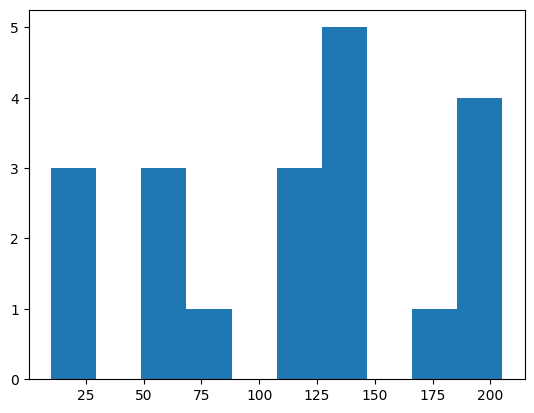

In [128]:
dataAmount = 20

# sadece aynı değilse ekle çünkü aynı topu iki kere çekemezsin
while len(results)<dataAmount:
    a = random.randint(0, maxNumber)
    if a not in results:
        results.append(a)

print(maxNumber)
results.sort()
print(results)

npArrResults = np.array(results)
plt.hist(npArrResults)
plt.show() 

Veri arttıkça uniform dağılıma yaklaşıyoruz. Bu dağılımın uniform olacağını varsayarak elimizdeki datadan yola çıkıp maks sayıyı tahmin edebiliriz. Hadi tanklarda bir deneme yapalım

In [131]:

# Alman tanklarının gerçek üretim sayısı
tankCount = random.randint(300,2000)

# Ele geçirilen tankların sayısı
capturedTanks = 30

# Ele geçirilen tankların seri numaralarını rastgele üretelim
serialNums = np.random.choice(range(1, tankCount + 1), capturedTanks, replace=False)

# En yüksek seri numarasını bulalım
maxSerial = np.max(serialNums)

# Alman Tank Problemi formülü ile tahmin yapalım
tahmini_tank_sayisi = maxSerial + (maxSerial / capturedTanks) - 1

print("Ele geçirilen tankların seri numaraları:")
print(serialNums)
print(f"En yüksek seri numarası: {maxSerial}")
print(f"Tahmini toplam tank sayısı: {tahmini_tank_sayisi:.2f}")



Ele geçirilen tankların seri numaraları:
[476 669 124 538 415 382 199 381 396  55 604  88 658 676 434 153 341 192
 577 118 691 259 296 675  97 515 313 600 258 479]
En yüksek seri numarası: 691
Tahmini toplam tank sayısı: 713.03


In [132]:
print(f"Gerçek toplam tank sayısı: {tankCount}")

Gerçek toplam tank sayısı: 728


Benzer bilimsel yaklaşımlardan biri 

# Capture-Recapture Yöntemi

In [152]:
import numpy as np
import random

# Gerçek popülasyon sayısı
gercek_populasyon = random.randint(300,1000)

# İlk yakalamada işaretlenen birey sayısı
isaretlenen_sayisi = 150

# İkinci yakalamada örnek alınan birey sayısı
ikinci_yakalama = 150

# Gerçek popülasyondan işaretleme işlemi
populasyon = np.arange(gercek_populasyon)
isaretli = np.random.choice(populasyon, isaretlenen_sayisi, replace=False)

# İkinci yakalamada rastgele birey seçelim
ikinci_yakalananlar = np.random.choice(populasyon, ikinci_yakalama, replace=False)

# İkinci yakalamada işaretli olanları bulalım
isaretli_yakalananlar = len(set(isaretli).intersection(ikinci_yakalananlar))

# Capture-recapture formülü ile popülasyon tahmini
tahmini_populasyon = (isaretlenen_sayisi * ikinci_yakalama) / isaretli_yakalananlar

print(f"İşaretlenen birey sayısı: {isaretlenen_sayisi}")
print(f"İkinci yakalamada işaretli birey sayısı: {isaretli_yakalananlar}")
print(f"Tahmini popülasyon: {tahmini_populasyon:.2f}")



İşaretlenen birey sayısı: 150
İkinci yakalamada işaretli birey sayısı: 51
Tahmini popülasyon: 441.18


In [153]:
print(f"Gerçek popülasyon: {gercek_populasyon}")

Gerçek popülasyon: 489
